# Proyecto Integrador: Psychopathy Prediction Based on Twitter Usage

#### Magda Karina López López

## Introducción

El uso de redes sociales ha aumentado de forma exponencial en la ultima década. Twitter es una red social muy popular por poder realizar publicación cortas con un limite de caracteres, donde se puede tener interacción con los temas de tendencia, publicar opiniones o compartir cosas de la vida diaria. Se estima que para 2025 Twitter tendrá un promedio de 360 millones de usuarios activos mensualmente, esto significa  el crecimiento previsto de los usuarios mundiales de Twitter entre 2021 y 2025 se mantendría en un rango comprendido entre el 1,3% y el 1,6%. (Fernández, 2022)

Existen distintos proyectos en los que se estudia el comportamiento de los usuarios en este tipo de redes sociales, un topico que se ha llegado a estudiar durante estos años es el comportamiento en línea de conductas de personalidad anti-social como lo es la psicopatía.  El estudiar este tipo de comportamientos en redes socialeses importante, ya que todos pueden tener acceso a ellas y hacer uso a conveniencia del usuario. Al poder identificar y predecir si un comportamiento esta relacionado a una conducta especifica como la de un psicópata puede ser información muy valiosa para ayudar a las personas o incluso prevenir sucesos desafortunados. 

En el trabajo presentado a continuación tiene como objetivo realizar un modelo de ciencia de datos que logre identificar de forma automática a personas que tienen un alto grado de Psicópatas basado en el uso de Twitter. Los datos usados constan de 337 variables derivadas de funciones de Twitter y análisis lingüístico provenientes de usuarios detectados como psicópatas. Se considera que un usuario tiene un alto grado de psicópata cuando su puntuación esta por arriba de la media más 2 desviaciones estándar. Los datos se proporcionan en un archivo csv que se cargará y explorará para ver cual es la relación de la variable objetivo y las demás variables, posteriormente con los resultados de esta exploración de datos se empezara a trabajar sobre el modelo para hacer las predicciones, en este caso se ocuparáa un modelo de random forest de la paquetería sklearn de Python, los resultados de este modelo se evaluaran usando la medida del error medio absoluto (MAE).



## Desarrollo

Antes de empezar a modelar sobre los datos es de suma importancia conocer el set de datos, es por eso que primero se aplica una exploración de los datos. El contenido de datos se encuentra en un archivo .csv que se leerá como un data frame de pandas 

*Se cargan los paquetes a usar en este proyecto*

In [1]:
#Librerias
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

*Se lee el archivo csv en un data frame*

In [2]:
data=pd.read_csv('PersonalityData_ExternalVersion001.csv/PersonalityData_ExternalVersion001.csv', index_col=0)

In [3]:
#Se imprimen los datos cargados
data

,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,Var2,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
uid,,,,,,,,,,,,,,,,,,,,,
1,2.444444,3.4,3.444444,7.0,6.0,5.5,3.5,3.5,48.59,0.0,...,4.86,1.31,2.05,0.66,0.92,1.14,4.37,0.71,15.11,45.70
2,1.888889,2.4,2.777778,7.0,4.5,6.0,3.0,5.5,41.29,0.0,...,8.28,0.04,0.46,2.34,2.99,0.38,1.46,2.83,21.90,53.49
3,1.111111,3.0,3.444444,5.5,6.0,6.0,6.5,3.0,14.65,0.0,...,3.07,0.20,2.63,1.72,0.64,0.42,2.74,0.11,10.13,32.77
4,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,0.0,...,1.65,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67
5,2.111111,3.1,1.333333,6.0,5.5,2.5,5.5,5.0,52.63,9.0,...,1.12,0.08,1.14,0.38,0.85,1.05,4.67,0.38,8.34,34.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2.000000,2.4,3.222222,6.0,6.5,3.0,3.5,4.5,10.13,0.0,...,4.19,0.00,2.99,0.00,1.80,0.00,3.59,0.00,14.37,37.72
2924,1.333333,3.0,2.444444,6.0,4.5,7.0,6.5,1.0,10.06,0.0,...,2.86,0.00,2.86,0.00,1.90,0.00,2.86,0.00,12.38,31.43
2925,2.777778,3.6,3.666667,3.5,2.5,3.5,5.0,5.5,10.00,0.0,...,10.43,0.87,0.00,4.35,0.00,0.00,0.87,0.00,19.13,59.13


### Exploración de datos

#### Correlación de las variables

Se observa que el dataframe contiene un gran numero de variables, pero la variable que nos interesa y será nuestro objetivo es el score almacenado en la variable de psychopathy, existen otras variables relacionadas a otro tipo de comportamiento antisocial como narcisismo, maquiavelismo, etc. Pero en este trabajo nos enfocaremos en los scores altos es psicopatía.

Se puede observar que estos datos ya se encuentran procesados, siendo así que el resto de variables están identificadas como Var y un numero consecutivo, ya que los valores importantes son los scores resultantes para cada tipo de comportamiento resultante de las funciones que aplicadas previamente con herramientas de Twitter y obtener estos resultados. 
Aun así se realizará un ejercicio de correlación entre la variable de psychopathy y el resto.

*Se aplica la función corr sobre el data frame para sacar la correlación entre las variables siendo 1 una correlación positiva muy alta y -1 una correlación negativa. Se guarda en un arreglo los resultados de la correlación de nuestra variable objetivo con el resto y a continuación solo se presentan las 10 mas altas.* 

In [37]:
import scipy.stats
import numpy as np
corr=[]
#Ciclo que recorre todas las comlumnas del df para sacar la correlacion con la variable de psycopathy
for i in data.columns:
    #se aplica una excepcion porque una de las variables marcaba error al hacer la correlacion
    try:
        corr.append([data['psychopathy'].corr(data[i]),i])
    except:
        corr.append([-10,i])
corr.sort(reverse=True)
#Se imprimen los 10 mejores resultados de correlacion de variables
corr[:10]

[[0.9999999999999998, 'psychopathy'],
 [0.431972636122896, 'machiavellianism'],
 [0.28594331196810624, 'narcissism'],
 [0.1475527251599112, 'Var55'],
 [0.1467962523628097, 'Var46'],
 [0.11084238438850609, 'neuroticism'],
 [0.09601597488055053, 'Var53'],
 [0.09555852523780607, 'extraversion'],
 [0.09328656604032108, 'Var14'],
 [0.0748496572345056, 'Var9']]

*Se carga la libreria para graficar la correlacion más alta de las variables*

In [57]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Correlación entre psychopathy y machiavellianism*

<AxesSubplot:xlabel='psychopathy', ylabel='machiavellianism'>

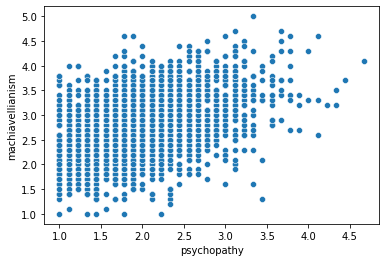

In [40]:
sns.scatterplot(x=data['psychopathy'], y=data['machiavellianism'])

*Correlación entre psychopathy y Var55*

<AxesSubplot:xlabel='psychopathy', ylabel='Var55'>

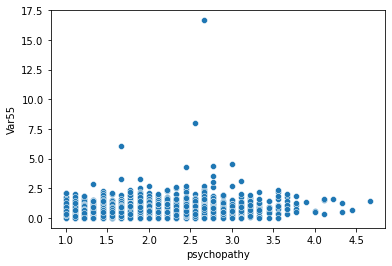

In [41]:
sns.scatterplot(x=data['psychopathy'], y=data['Var55'])

*Correlación entre psychopathy y Var46*

<AxesSubplot:xlabel='psychopathy', ylabel='Var46'>

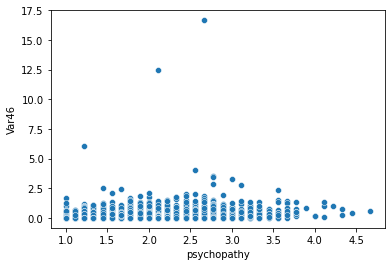

In [42]:
sns.scatterplot(x=data['psychopathy'], y=data['Var46'])

*Se saca un resumen de las estadísticas de los datos*

In [4]:
data['psychopathy'].describe()

count    2927.000000
mean        1.975819
std         0.590817
min         1.000000
25%         1.555556
50%         1.888889
75%         2.333333
max         4.666667
Name: psychopathy, dtype: float64

### Construcción del modelo

Una vez explorando los datos, se puede decir que la variable de psychopathy es la que nos proporciona los datos que se ocuparan para la construcción del modelo, el objetivo es determinar si es un score alto para psicópata o no. 

Es por eso que a continuación se crea una función que determina si el score es alto para psicópata o no. Esta métrica se define como 2 desviaciones estándar arriba de la media de 1.98, según el checklist desarrollado por Professor Del Paulhus de la Universidad de British Columbia

In [5]:
###scoring high in Psychopathy,  defined as 2 SD's above a mean of 1.98.
def isPsyco(x):
    score=1.98+(2*0.590817)
    if x>=score:
        return True
    else:
        return False        

Construcción de un data frame con las variables:
* Score: variable numérica que indica el nivel de psicópata 
* Scoring high in Psychopathy: variable booleana donde verdadero es igual a que tiene un nivel alto en psicópata y Falso es que no tiene un nivel alto en psicópata. Este valor es asignado por la función isPsyco
* Var1 y Var2:  variables con mayor correlación con la variable psychopathy, se usan para darle mayor robustez al modelo 


In [45]:
dfPsyco=pd.DataFrame()
dfPsyco['Score']=data['psychopathy']
dfPsyco['Scoring high in Psychopathy']=data['psychopathy'].apply(isPsyco)
dfPsyco['Var1']=data['Var55']
dfPsyco['Var2']=data['Var12']

Despliegue de los resultados que dieron positivo para alto en psicópata 

In [46]:
dfPsyco[dfPsyco['Scoring high in Psychopathy']==True]

,Score,Scoring high in Psychopathy,Var1,Var2
uid,,,,
20,3.555556,True,0.83,2711.0
66,3.555556,True,1.56,62.0
74,3.222222,True,0.21,3219.0
84,3.444444,True,0.49,176.0
117,3.777778,True,1.05,3185.0
...,...,...,...,...
2818,3.222222,True,0.65,269.0
2828,3.666667,True,0.71,309.0
2866,3.333333,True,0.00,4.0


Se divide el data frame en las variables(X) y la variable objetivo(y) que es Scoring high in Psychopathy

In [47]:
X=dfPsyco[['Score','Var1','Var2']]
y=dfPsyco['Scoring high in Psychopathy']

Se dividen los datos en datos de prueba y datos de entrenamiento usando la función train_test_split

In [48]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

Como se va a usar un pipeline para aplicar el modelo, primero se define que tipo de tratamiento se les aplicara a los datos nulos o que aparecen con NaN en el DF. En este caso se usara la función de simpleImputer con la estrategia de sustituir estos valores nulos con el valor de la media 

In [49]:
numerical_transformer = SimpleImputer()

Se define el preprocesamiento para sustituir nulos en valores numéricos de las columnas Score, Var1 y Var2, se define el modelo en este caso es un RandomForestRegressor de la paquetería sklearn y finalmente se define el pipeline a usar y se guarda en la variable my_pipeline

In [50]:
#preprocesamiento para varaibles numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Score','Var1','Var2'])
    ])
#modelo
model = RandomForestRegressor(n_estimators=100, random_state=0)
#pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

Se entrena el modelo con los datos de entrenamiento 

In [51]:
my_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Score', 'Var1', 'Var2'])])),
                ('model', RandomForestRegressor(random_state=0))])

Se sacan las predicciones para los datos de prueba 

In [52]:
preds = my_pipeline.predict(val_X)

Se mide el desempeño del modelo

In [53]:
score = mean_absolute_error(val_y, preds)
print('MAE:', score)

MAE: 0.0


Se comparan los resultados de las predicciones con el valor real de los datos de prueba

In [67]:
pd.DataFrame({'y':val_y, 'pred':preds}).head(10)

,y,pred
uid,,
2127,False,0.0
723,False,0.0
2699,False,0.0
1962,True,1.0
306,False,0.0
1139,False,0.0
2197,False,0.0
1663,False,0.0
2135,False,0.0


### Comparación de resultados con otro modelo

Se aplica el modelo de clasificador Naive Bayes para comparar el desempeño de ambos modelos aplicados 

In [64]:
from sklearn.naive_bayes import GaussianNB
#modelo clasificador de Naive Bayes
model_nb = GaussianNB()
#pipeline con modelo Naive Bayes, se aplica el mismo preprocesamiento
my_pipeline_nb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_nb)
                             ])
#Entrenamiento
my_pipeline_nb.fit(train_X, train_y)
#Predicciones
preds_nb = my_pipeline_nb.predict(val_X)
#Medida para el desempeño del modelo
score_nb = mean_absolute_error(val_y, [int(i) for i in preds_nb])
print('MAE:', score_nb)

MAE: 0.006830601092896175


Se observa que la métrica de error es diferente de cero a comparación de la métrica de error de RandomForest que era cero, lo cual nos indica que el mejor modelo para este set de datos es RandomForest

In [66]:
pd.DataFrame({'y':val_y, 'pred':preds, 'pred_nb': preds_nb}).head(10)

,y,pred,pred_nb
uid,,,
2127,False,0.0,False
723,False,0.0,False
2699,False,0.0,False
1962,True,1.0,False
306,False,0.0,False
1139,False,0.0,False
2197,False,0.0,False
1663,False,0.0,False
2135,False,0.0,False


## Conclusiones

El verdadero reto de este trabajo era trabajar con una muestra de datos muy pequeña, ya que solo el 3%  del total de los scores eran altos para psicopatía. Con esta pequeña muestra se construyo el modelo y se dividieron los datos en set de prueba y de entrenamiento. El modelo de RandomForest tuvo buenos resultados al predecir los datos de prueba, ya que la métrica de error medio absoluto fue cero al comparar los resultados obtenidos por el modelo y los datos verdaderos, con este resultado se podría llegar a la conclusión que el modelo funciona muy bien ya que predice los valores esperados y definir si un score es alto en psicopatía o no. Pero, por otro lado, también se podría decir que esta modelo esta sobre ajustado ya que funciona perfectamente para predecir los resultados del set de entrenamiento y prueba, pero para nuevos valores posiblemente no se obtendrían las predicciones correctas, ya que el modelo tiene configuraciones para predecir específicamente los resultados del set de prueba y entrenamiento. 

Se aplico de igual manera un modelo clasificador Naive Bayes para obtener los mismos resultados para el set de prueba, en este la métrica MAE, fue diferente de cero y se pudo observar en una muestra de los primeros 10 resultados del set de prueba que para un valor que debía ser verdadero para un score alto en psicopatía, lo clasifico como negativo. Esto, como con el modelo anterior, no significa que sea muy bueno o malo, es cierto que la métrica MAE es diferente de cero, pero es bastante cerca al 0, por lo que aun puede arrojar buenos resultados ya que posiblemente este modelo no este sobre ajustado solo para los datos de entrenamiento. 

Desafortunadamente para este trabajo no se proporciono un tercer set de datos de validación y así poder aplicar los modelos, ver los resultados de ambos, hacer una comparativa y así determinar si alguno de los modelos tenia un sobreajuste o arrojaba buenos resultados de predicción. 
Como conclusión me gustaría quedarme con los resultados arrojados por el modelo de RandomForest ya que las predicciones fueron iguales a los valores reales a diferencia del modelo NB que tuvo un error de predicción, pero sabiendo que podría existir un sobreajuste del modelo al tener una muestra pequeña de datos.
Poder aplicar este tipo de modelos de Machine Learning a problemas que tiene un impacto en la sociedad, ya que se está hablando de detectar comportamientos de personalidades antisociales en redes sociales, es posible y se puede hacer de forma automática con la propuesta que se planteó del modelo de RandomForest con el que se obtuvieron buenos resultados en el set de prueba. En futuros trabajos se podría realizar este mismo modelado, pero para otro tipo de comportamientos como narcisismos o maquiavelismo y ver si se obtienen de igual forma resultados buenos y así poder abarcar los distintos tipos de comportamientos en redes sociales. 


## Referencias 

Fernández, R. (2022). Previsión del número de usuarios mensuales activos (MAU) de Twitter a nivel mundial desde 2021 hasta 2025. Obtenido de https://es.statista.com/estadisticas/636174/numero-de-usuarios-mensuales-activos-de-twitter-en-el-mundo/

Personality Prediction Based on Twitter Stream. (s.f.). Obtenido de https://www.kaggle.com/competitions/twitter-personality-prediction/data

Sumner, Chris & Byers, Alison & Boochever, Rachel & Sumner, Chris & Byers, Alison & Boochever, Rachel & Park, Gregory. (2012). Predicting Dark Triad Personality Traits from Twitter Usage and a Linguistic Analysis of Tweets. Proceedings - 2012 11th International Conference on Machine Learning and Applications, ICMLA 2012. 2. 10.1109/ICMLA.2012.218. 
